## 配合課程影片 hmwu_StatR-02.3
### Exercise 2-3

# 大數法則


In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# 請生成從1至800，且間隔5為的數列 sample.size（sequence）：
sample_size = np.arange(1, 801, 5)
print(sample_size)

# 請生成長度為 m 的零向量 xbar（0 vector）：
m = len(sample_size)
print(m)

xbar = np.zeros_like(sample_size, dtype = float)
print(xbar)

[  1   6  11  16  21  26  31  36  41  46  51  56  61  66  71  76  81  86
  91  96 101 106 111 116 121 126 131 136 141 146 151 156 161 166 171 176
 181 186 191 196 201 206 211 216 221 226 231 236 241 246 251 256 261 266
 271 276 281 286 291 296 301 306 311 316 321 326 331 336 341 346 351 356
 361 366 371 376 381 386 391 396 401 406 411 416 421 426 431 436 441 446
 451 456 461 466 471 476 481 486 491 496 501 506 511 516 521 526 531 536
 541 546 551 556 561 566 571 576 581 586 591 596 601 606 611 616 621 626
 631 636 641 646 651 656 661 666 671 676 681 686 691 696 701 706 711 716
 721 726 731 736 741 746 751 756 761 766 771 776 781 786 791 796]
160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
# 利用 Bernoulli 試驗說明大數法則
# 將 m 次 Bernoulli 試驗抽樣結果取平均後，依序填入零向量 xbar中：
for i in range(m):
    xbar[i] = stats.binom.rvs(1, 0.5, size = sample_size[i]).mean()

print(xbar)

[0.         0.5        0.36363636 0.5625     0.47619048 0.46153846
 0.4516129  0.38888889 0.51219512 0.5        0.50980392 0.58928571
 0.47540984 0.54545455 0.46478873 0.59210526 0.5308642  0.44186047
 0.47252747 0.48958333 0.47524752 0.5        0.53153153 0.46551724
 0.48760331 0.46031746 0.50381679 0.49264706 0.43971631 0.47945205
 0.50331126 0.52564103 0.50310559 0.43373494 0.47953216 0.52840909
 0.44198895 0.53225806 0.5078534  0.45918367 0.49751244 0.50970874
 0.54028436 0.46296296 0.54751131 0.50442478 0.52813853 0.52966102
 0.46887967 0.5203252  0.5059761  0.51953125 0.53256705 0.5037594
 0.51660517 0.51811594 0.41281139 0.52797203 0.50171821 0.47635135
 0.52491694 0.47712418 0.50160772 0.49367089 0.50778816 0.55521472
 0.50755287 0.4702381  0.50439883 0.52601156 0.47008547 0.48314607
 0.48199446 0.52459016 0.50673854 0.48404255 0.4671916  0.51295337
 0.51662404 0.47727273 0.46882793 0.50985222 0.47445255 0.48076923
 0.49406176 0.48826291 0.50580046 0.51605505 0.50793651 0.46636

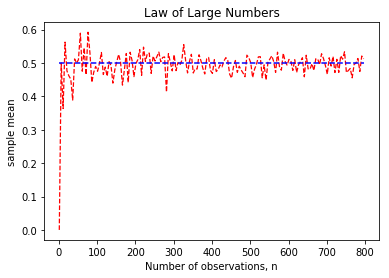

In [4]:
# 觀察 Bernoulli 試驗大數法則的視覺化結果：( 理論上平均值 h  = 0.5 )
# Hint: x軸為sample.size，y軸為xbar
plt.plot(sample_size, xbar, 'r--', linewidth = 1.25)
plt.plot(sample_size, np.repeat(0.5, repeats = m), "b--")
plt.xlabel('Number of observations, n')
plt.ylabel('sample mean')
plt.title(r'Law of Large Numbers')
plt.show()

In [5]:
# 應用 CLT 計算通過人數 > 126 的機率
z = (126./210. - 0.7) / np.sqrt(0.001)
print("通過人數 >126 的機率：{0:0.6f}".format(1 - stats.norm.cdf(z, loc = 0, scale = 1)))

通過人數 >126 的機率：0.999217


In [6]:
#  請應用CLT計算「考生及格人數大於某數量的機率」之副程式 CLT_passprob：

def CLT_passprob(x, n, p, digit):
    # 樣本平均數 xbar：
    xbar = x/n
    
    # 理論上的母體平均數 mu 與變異數 sigma2：
    mu = p
    sigma2 = p*(1-p)
    
    # 樣本的平均數 xbar.mu 與變異數 xbar.sigma2：
    xbar_mu = mu
    xbar_sigma2 = sigma2/n
    
    # 標準化 Z-Score：
    z = (xbar - xbar_mu)/np.sqrt(xbar_sigma2)
    zvalue = round(z, digit)
    
    # Z ~ N(0, 1)，計算 P(Z > zvalue) = right_prob：
    right_prob = 1 - stats.norm.cdf(z, loc = 0, scale = 1)
    
    return {"zvalue": zvalue, "CLT_prob": right_prob}

CLT_passprob(x = 126, n = 210, p = 0.7, digit = 6)

{'zvalue': -3.162278, 'CLT_prob': 0.9992172988709987}

In [7]:
# 生出女兒，或生了3個孩子就停止，請計算有女兒的機率：
# 生出女孩的機率 0.49，生出男孩 0.51
# 女孩：0-48 / 男孩：49-99

def girl_born(n, show_id):
    # 女兒數量的起始計數 girl.count：
    girl_count = 0
    for i in range(n):
        # 小孩總數量的起始計數 child.count：
        child_count = 0

        while True:
            rn = np.random.randint(0, 100)
            
            if show_id:
                print("({})".format(rn), end="")
            # 當 rn <= 48時，判定為女孩：
            is_girl = np.where(rn <= 48, True, False)
            child_count += 1

            if is_girl:
                girl_count += 1
                if show_id:
                    print("女+", end="")
                break
                
            elif child_count == 3:
                # else if 當小孩總數量 child.count 為 3 時，結束計數：
                if show_id:
                    print("男".format(rn), end="")
                break
                
            else:
                if show_id:
                    print("男".format(rn), end="")

        if show_id == True:
            print("\n")
                
                
    # 重複實驗次數 n 組中，有生出女兒 girl.count 的比例 p：
    p = girl_count / n
    print('----------------------------')
    print(p)
    print('----------------------------')
        
girl_born(n = 10, show_id = True)

(53)男(77)男(73)男

(91)男(4)女+

(43)女+

(71)男(61)男(58)男

(14)女+

(26)女+

(82)男(17)女+

(27)女+

(3)女+

(97)男(62)男(4)女+

----------------------------
0.8
----------------------------


## 挑戰題：手刻驗證中央極限定理

(1, 500)


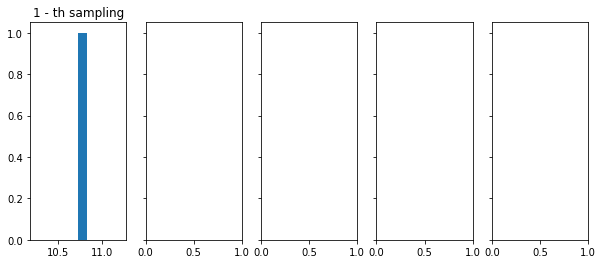

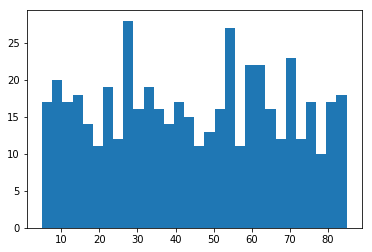

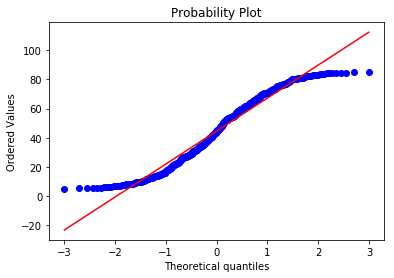

(5, 500)


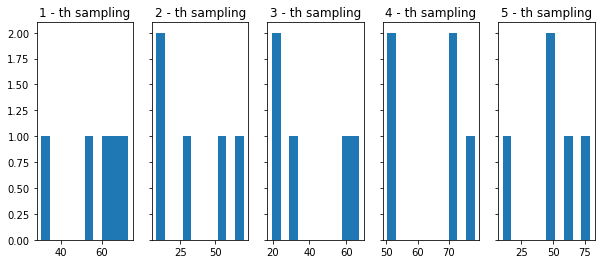

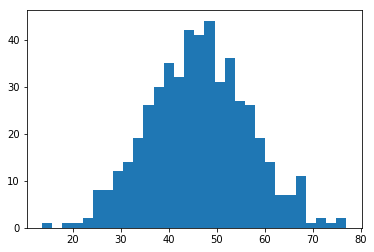

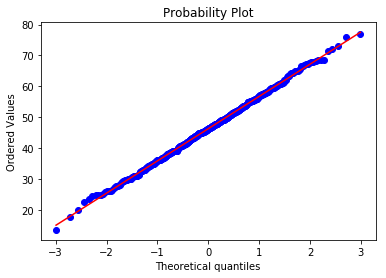

(10, 500)


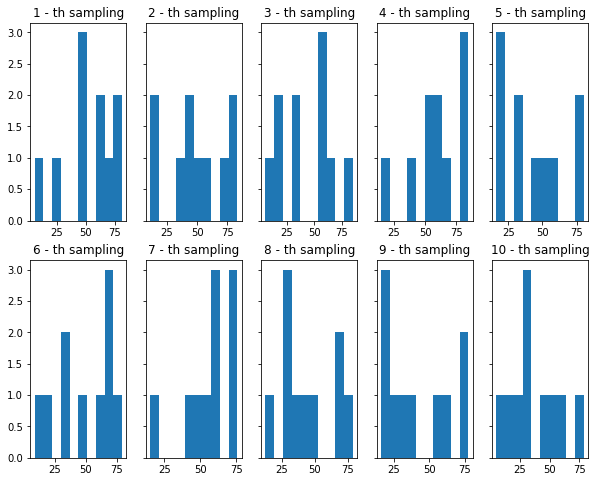

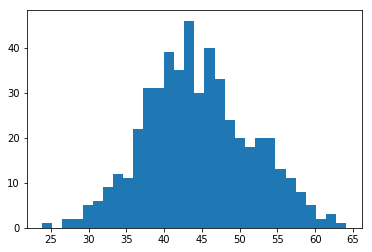

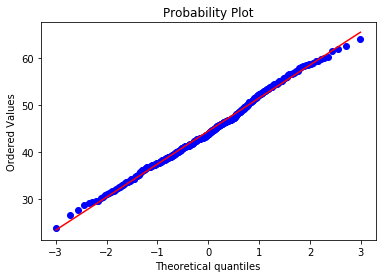

(50, 500)


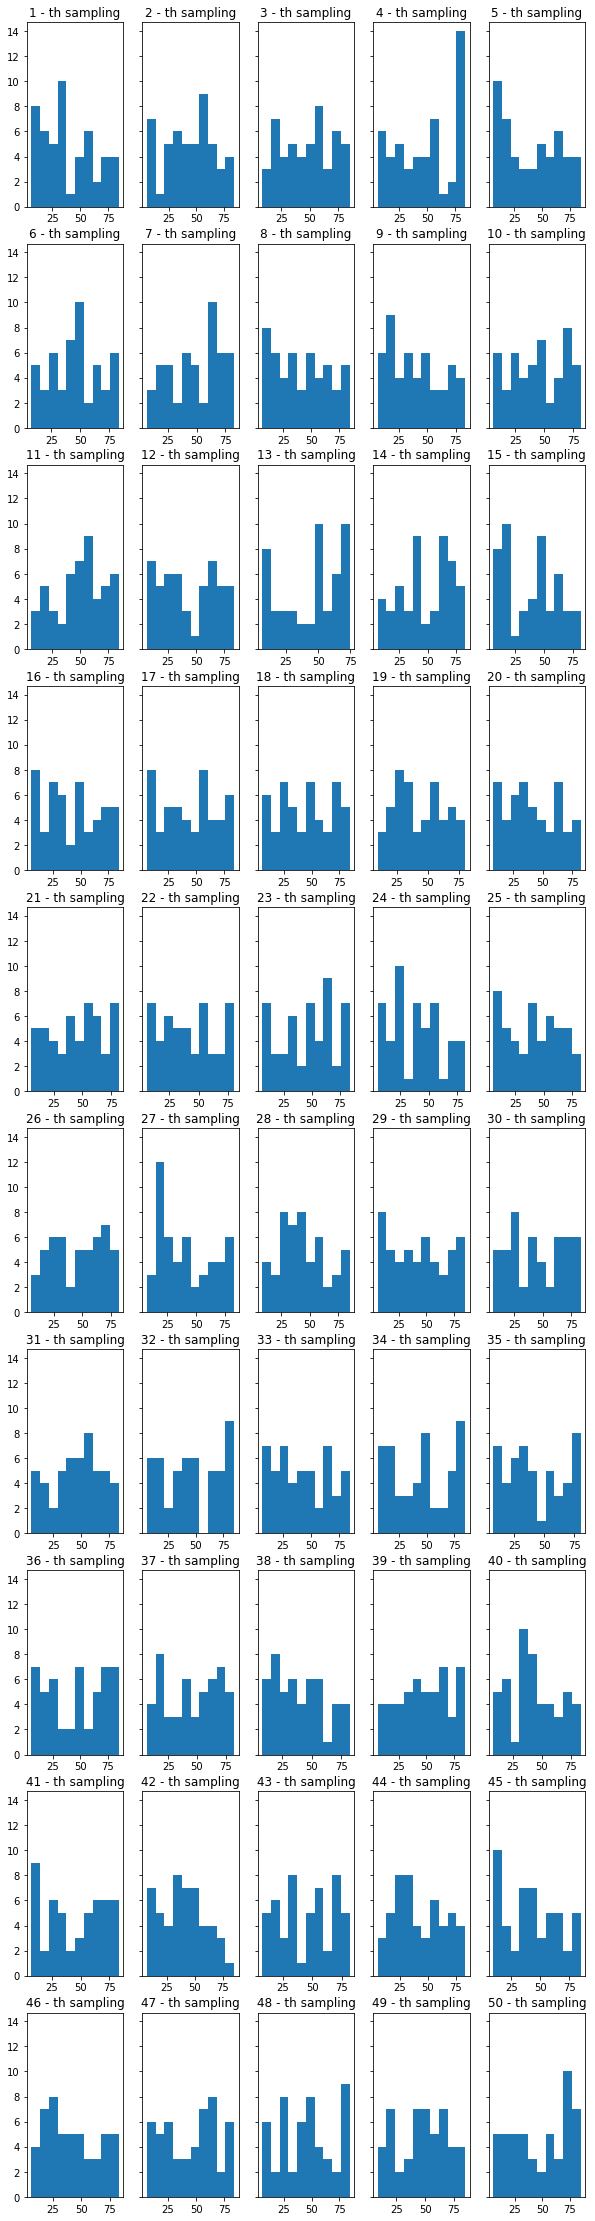

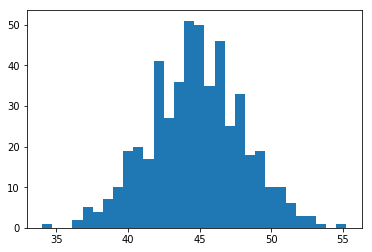

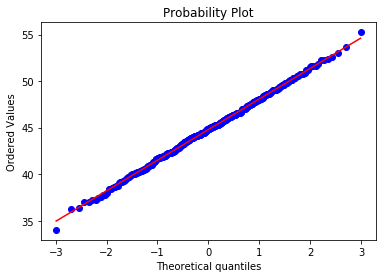

In [8]:
import numpy as np 
import pylab 
import scipy.stats as stats



# Xi ~ U(umin, umax)，觀察樣本平均數的抽樣分配
# 重複不同的樣本數，當樣本數 n.sample 越大，樣本平均數的抽樣分配越趨近於 CLT 的結論：

def CLT_unif(umin, umax, n_sample, n_repeated):
    # 請生成零矩陣（Zero Matrix），維度 n.sample * n.repeated：
    RandomSample = np.zeros((n_sample, n_repeated))
    fig, axs = plt.subplots(math.ceil(n_sample/5), 5, squeeze=False, sharey=True, figsize=(10,4*math.ceil(n_sample/5)))
    # 每次抽樣 n.sample 個樣本，並將此過程重複操作 n.repeated 次：
    for i in range(n_repeated):
        # X_1, X_2, ...., X_n.sample ~ U(umin, umax)：rnumber is a vector
        rnumber = stats.uniform.rvs(umin, umax, size = n_sample)
        
        # 將每次抽樣結果 rnumber 存入樣本矩陣 RandomSample 的每一行(column)：
        RandomSample[:, i] = rnumber
        
    print(RandomSample.shape)
    
    # 以直方圖(Histogram)觀察每次抽樣的分配結果：
    # 重複觀察抽樣分配結果 min(n.repeated, n.smaple) 次
    for i in range(min(n_repeated, n_sample)):
        title = str(i+1) + " - th sampling"
        # 每次抽樣的分配結果已儲存於 RandomSample 的每一行(column)：
        axs[i//5, i%5].set_title(title)
        axs[i//5, i%5].hist(RandomSample[:, i], label = title)
    plt.show()
    # 請計算每一行的樣本平均值(column mean of sample)：
    # 將每次抽樣的分配結果各自計算平均，並依序儲存於抽樣平均值向量 SampleMean
    # Hint: 計算 RandomSample 每一行(column)的平均值
    SampleMean = RandomSample.mean(axis = 0) 
    plt.hist(SampleMean, bins=30)
    plt.show()
    #qqnorm
    stats.probplot(SampleMean, dist="norm", plot=pylab)
    pylab.show()
    
CLT_unif(5, 80, 1, 500)
CLT_unif(5, 80, 5, 500)
CLT_unif(5, 80, 10, 500)
CLT_unif(5, 80, 50, 500)